In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels as sm
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, recall_score, f1_score, precision_score, plot_roc_curve, RocCurveDisplay, auc, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris 


# K-Means
![img](cluster.png);

### Clustering === Agrupar

In [2]:
data = load_iris(as_frame=True)
X = data.data
y = data.target

X,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

#### Normalmente no se hace split en este tipo de algoritmo

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
X_train.shape, X_test.shape

((135, 4), (15, 4))

<AxesSubplot:title={'center':'Elbow Plot'}, xlabel='Number of clusters', ylabel='Sum of Squared Errors'>

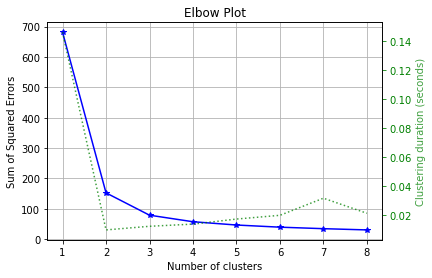

In [4]:
import scikitplot as skplt

km = KMeans(random_state=123, n_clusters=3)
skplt.cluster.plot_elbow_curve(km, X, cluster_ranges = range(1,9))

## El número óptimo de clusters es 3...

In [7]:
km = KMeans(random_state=123, n_clusters=3)
y_pred_train = km.fit_predict(X_train)
y_pred = km.predict(X_test)

centers = km.cluster_centers_
centers

array([[4.975     , 3.42727273, 1.45909091, 0.24772727],
       [6.83888889, 3.08611111, 5.71666667, 2.04166667],
       [5.86181818, 2.74363636, 4.39454545, 1.44363636]])

#### Reducción Dimensionalidad.... pero solo para poder visualizar los resultados

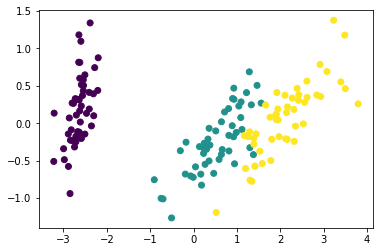

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_total_pca = pca.fit_transform(X)

plt.scatter(X_total_pca[:,0], X_total_pca[:,1], c=y)

In [11]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

centers_pca = pca.transform(centers)
centers_pca


c:\ProgramData\Anaconda3\envs\dl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-2.68334051,  0.19954074],
       [ 2.30969734,  0.27027454],
       [ 0.63487051, -0.33653957]])

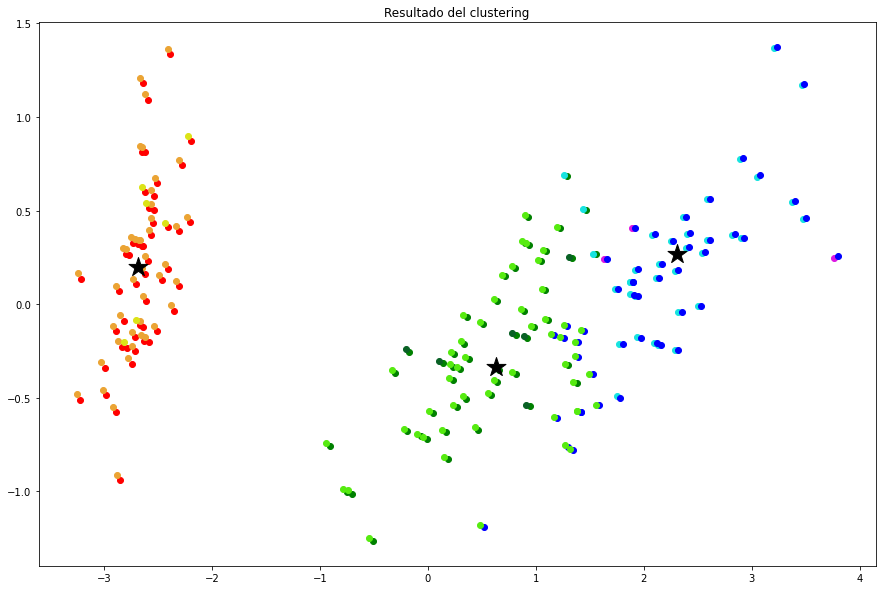

In [22]:
### Vamos a tratar de plotear cada uno de las Clases Reales, con las Clases Predichas en Train y en Test...
real_colors = ['r', 'g', 'b']
train_predicted_colors = ['#eba434', '#17e3e0', '#56eb10']
test_predicted_colors = ['#dce317', '#dc17e3', '#096125']

plt.figure(figsize=(15,10))
plt.title('Resultado del clustering')
for l, c, trc, tec in zip(range(3), real_colors, train_predicted_colors, test_predicted_colors):
    idx_real = y.loc[lambda x: x == l].index
    idx_tr_predict = y_pred_train == l
    idx_predict = y_pred == l

    plt.scatter(X_total_pca[idx_real,0], X_total_pca[idx_real,1], c=c)
    plt.scatter(X_train_pca[idx_tr_predict,0], X_train_pca[idx_tr_predict,1], c=trc)
    plt.scatter(X_test_pca[idx_predict,0], X_test_pca[idx_predict,1], c=tec)
plt.scatter(centers_pca[:,0], centers_pca[:,1], c='k', marker='*', s=400)

In [24]:
X_train['pred'] = y_pred_train
X_train.groupby('pred').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
pred,,,,
0,4.975000,3.427273,1.459091,0.247727
1,6.838889,3.086111,5.716667,2.041667
2,5.861818,2.743636,4.394545,1.443636


## Aplicación Chora

In [30]:
from matplotlib.image import imread
### RGB (rojo, verde, azul)
im = imread('peppers-large.tiff')
im.shape  # tensor

(512, 512, 3)

(-0.5, 511.5, 511.5, -0.5)

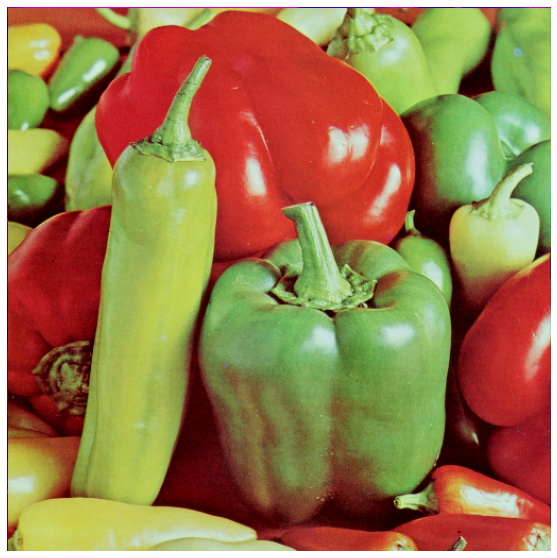

In [32]:
plt.figure(figsize=(15,10))
plt.imshow(im)
plt.axis('off')

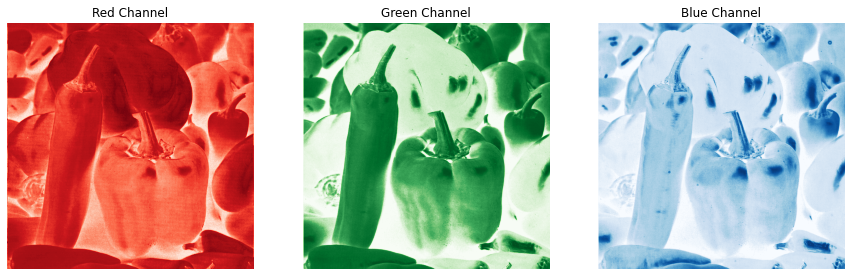

In [37]:
## Ver los canales de la foto....
color = ['Red', 'Green', 'Blue']
plt.figure(figsize=(15,10))
for idx, color in zip(range(3), color):
    plt.subplot(1,3,idx+1)
    new_pic = np.expand_dims(im[:,:,idx], -1)
    plt.imshow(new_pic, cmap= color+'s')
    plt.axis('off')
    plt.title(f'{color} Channel')

In [39]:
np.min(im), np.max(im)

(0, 237)

In [52]:
pixeles = im.reshape(-1,3)/255  ## nivel de pixel. Ahora vamos a aplicar un clustering...

## Modelo de compresión


In [54]:
pixeles  ## 24 bits 0,255.... 256 = 2^8---- 8*3 = 24 bits

## 12 bits... 16 valores... 2^4 .... 4*3 = 12 bits.... Vamos a tener una imagen de menor resolución..

array([[0.39607843, 0.        , 0.        ],
       [0.54901961, 0.        , 0.55686275],
       [0.59215686, 0.        , 0.57254902],
       ...,
       [0.65098039, 0.78039216, 0.58823529],
       [0.67058824, 0.80392157, 0.70980392],
       [0.77647059, 0.78431373, 0.67058824]])

In [59]:
km_colores = KMeans(random_state=123, n_clusters=16)
cluster = km_colores.fit_predict(pixeles)
cluster.shape

(262144,)

In [62]:
pd.Series(cluster).value_counts()

13    30027
7     30020
1     25541
10    24267
4     22097
11    19799
15    16150
3     15094
0     14131
12    13176
6     12862
5     11571
2     10958
8     10471
9      5475
14      505
dtype: int64

In [67]:
centers = km_colores.cluster_centers_
centers

array([[4.59789396e-01, 4.15149528e-01, 2.04456932e-01],
       [7.22265979e-01, 1.58838576e-01, 1.48959576e-01],
       [7.58603080e-01, 8.57161927e-01, 7.55448074e-01],
       [1.82948346e-01, 6.77831811e-03, 4.25771793e-03],
       [6.08440569e-01, 7.00828948e-01, 3.05947511e-01],
       [7.19107297e-01, 7.99673203e-01, 5.67397973e-01],
       [3.45444096e-01, 4.45862526e-02, 4.21471318e-02],
       [7.25744271e-01, 7.89385299e-01, 3.47207230e-01],
       [4.43207003e-01, 2.40346951e-01, 1.42962325e-01],
       [7.92388091e-01, 4.49669623e-01, 2.95399065e-01],
       [4.73568103e-01, 6.75029949e-01, 3.31192368e-01],
       [4.47116051e-01, 5.61500945e-01, 2.56009481e-01],
       [5.50247767e-01, 7.49612934e-01, 4.39358419e-01],
       [7.97094883e-01, 2.23587943e-01, 1.71642967e-01],
       [5.96233741e-01, 1.49880108e-15, 7.21871481e-01],
       [5.70648315e-01, 8.48032237e-02, 9.75248360e-02]])

In [70]:
centros = np.array(['azul','verde','rojo'])
grupos = np.array([0,0,1,2,1,2])

centros[grupos]

array(['azul', 'azul', 'verde', 'rojo', 'verde', 'rojo'], dtype='<U5')

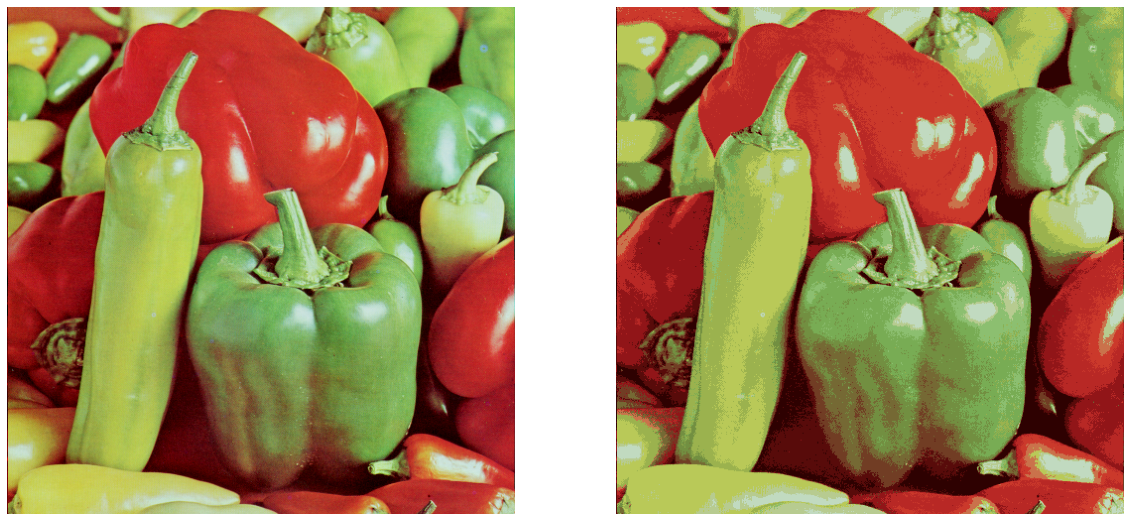

In [76]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(centers[cluster].reshape(512,512,3))
plt.axis('off');